In [90]:
from statsmodels.tsa.seasonal import STL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data

In [77]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data/'
prices = pd.read_csv(INPUT_FOLDER + 'r_da_prices.csv')

      AREAS              DateTime  price_obs
0        FR  2015-01-01T00:00:00Z      51.93
1        FR  2015-01-01T01:00:00Z      48.76
2        FR  2015-01-01T02:00:00Z      42.27
3        FR  2015-01-01T03:00:00Z      38.41
4        FR  2015-01-01T04:00:00Z      35.72
...     ...                   ...        ...
35059    FR  2018-12-31T19:00:00Z      50.01
35060    FR  2018-12-31T20:00:00Z      45.50
35061    FR  2018-12-31T21:00:00Z      49.80
35062    FR  2018-12-31T22:00:00Z      44.26
35063    FR  2018-12-31T23:00:00Z      51.00

[35064 rows x 3 columns]


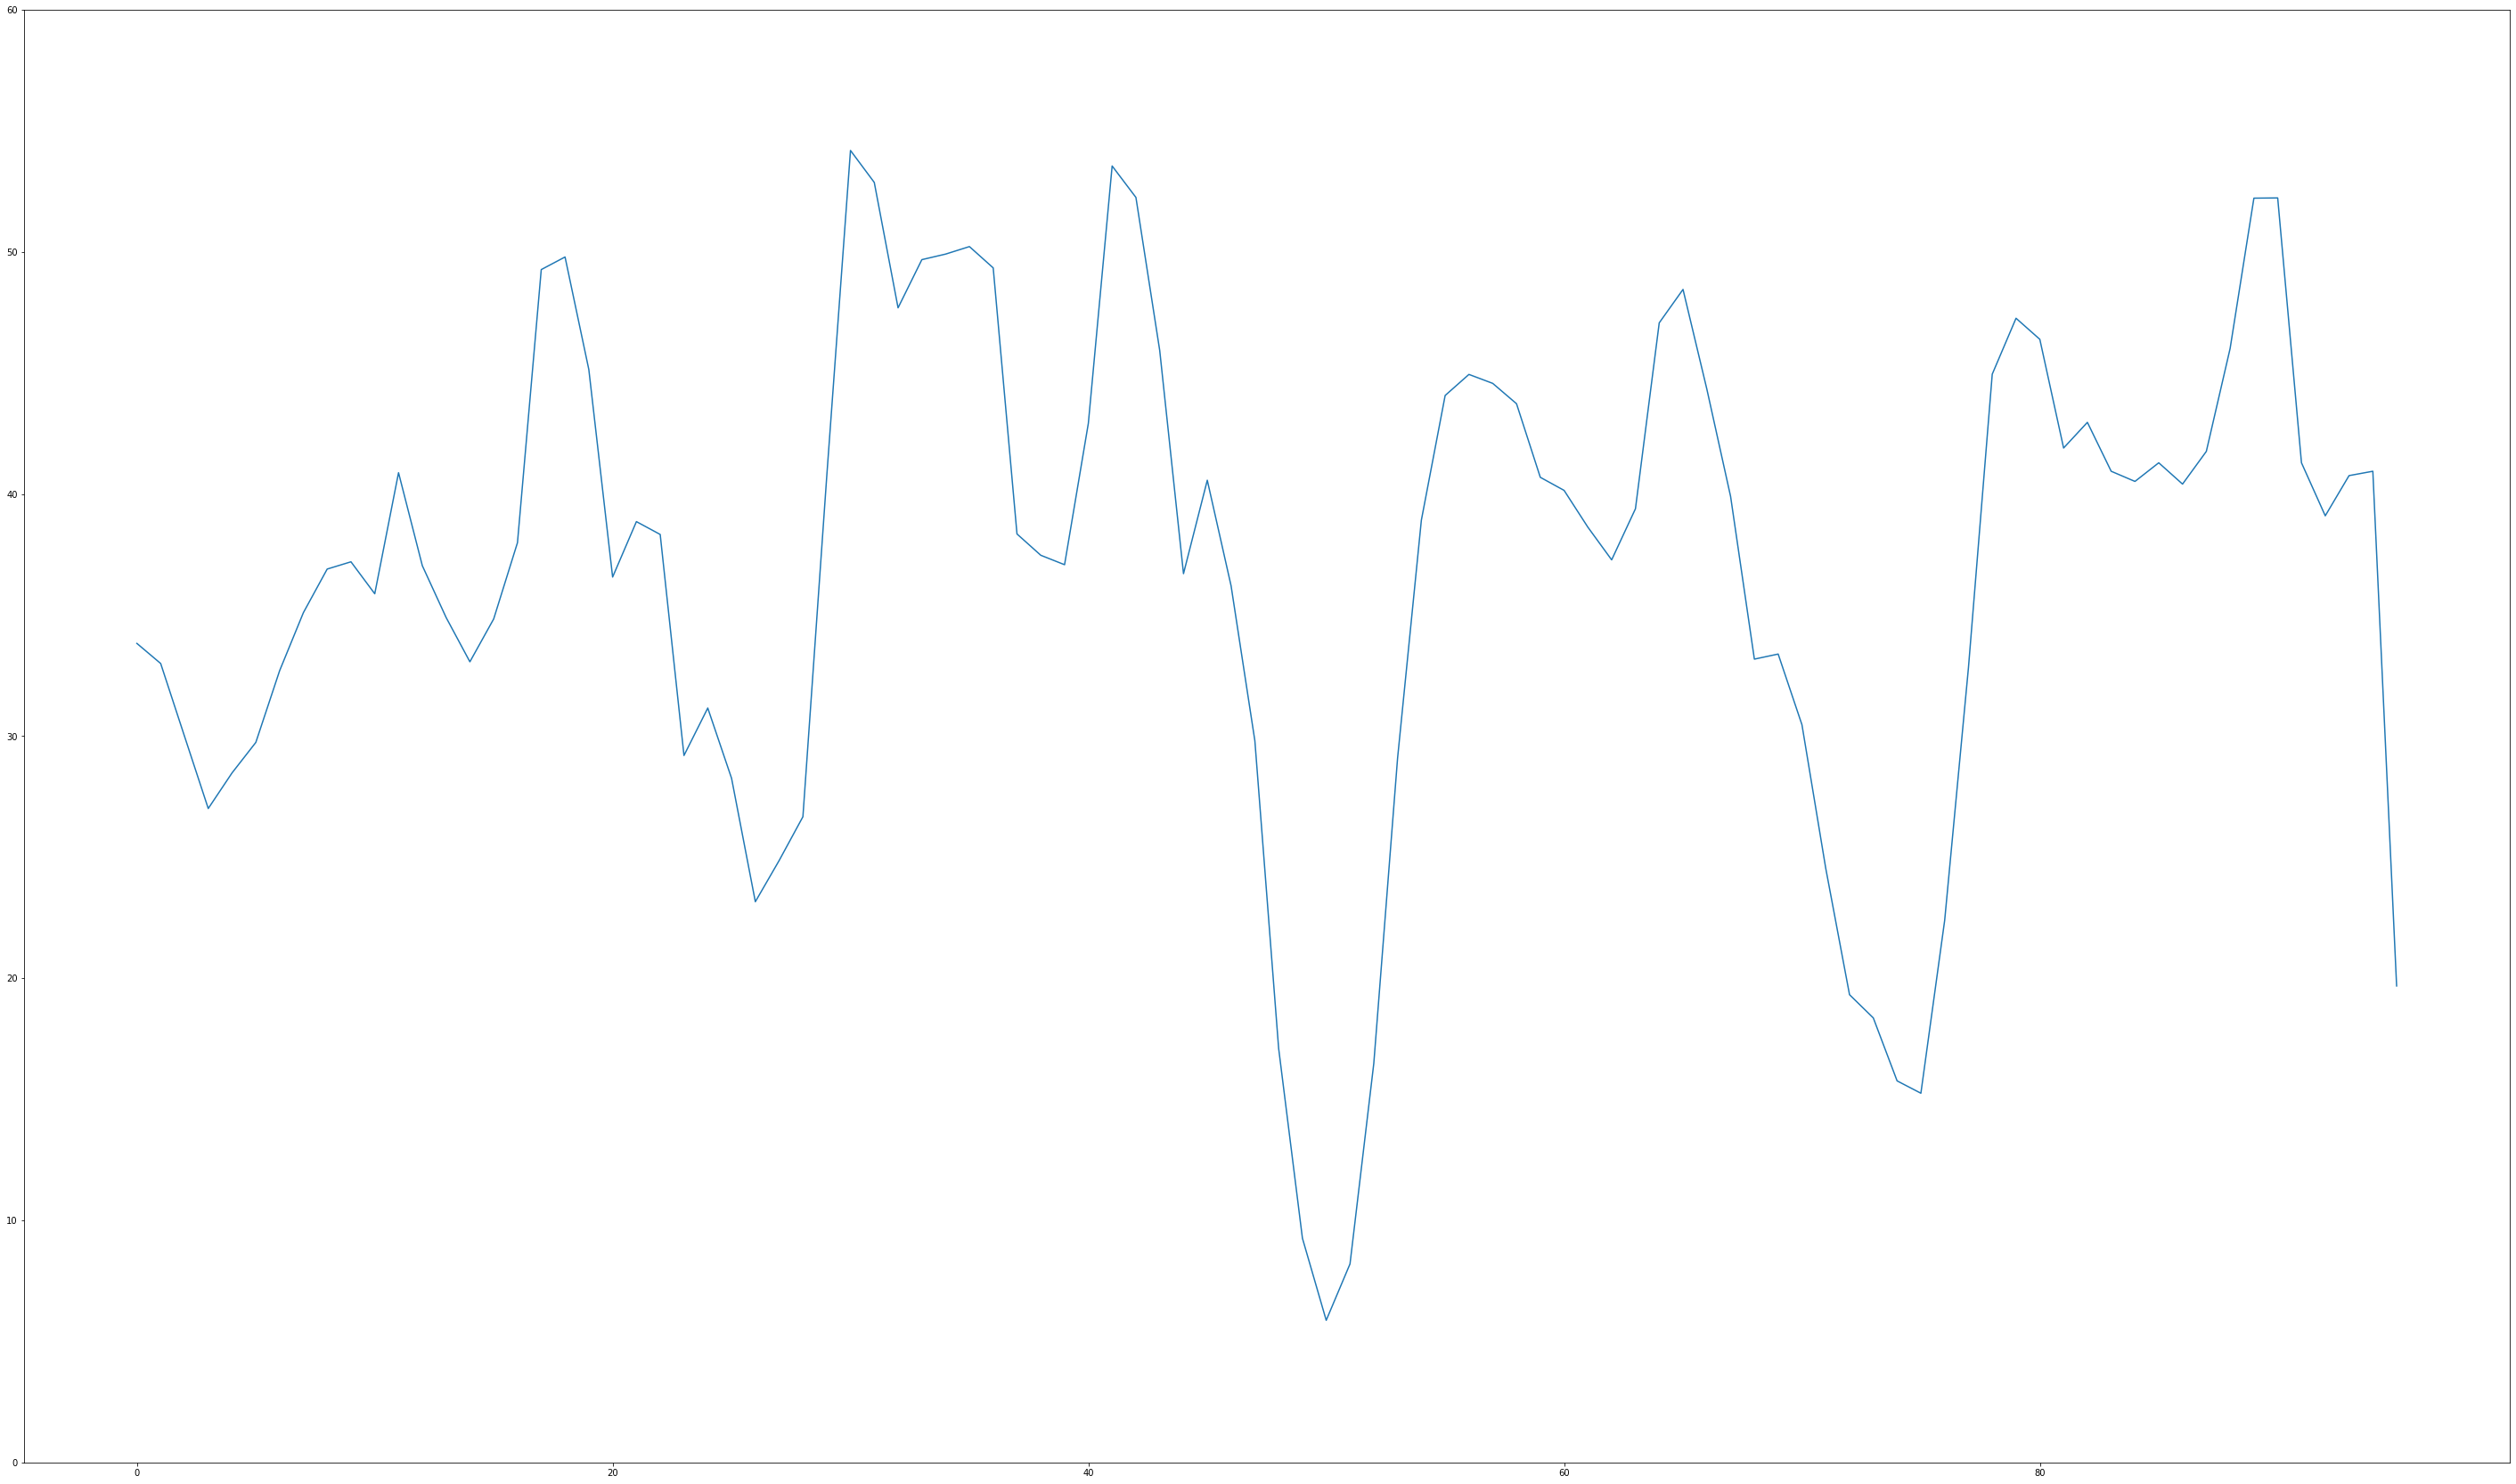

In [78]:
print(prices)
alpha = 1
prices_2015 = prices['price_obs'][3*8760 + 2* 168:3*8760 + 2*168 + 3*24 + 24].to_numpy()
plt.figure(figsize=(50, 30))
plt.ylim(0,60)
plt.plot(prices_2015)

      AREAS              DateTime  price_obs
0        FR  2015-01-01T00:00:00Z      51.93
1        FR  2015-01-01T01:00:00Z      48.76
2        FR  2015-01-01T02:00:00Z      42.27
3        FR  2015-01-01T03:00:00Z      38.41
4        FR  2015-01-01T04:00:00Z      35.72
...     ...                   ...        ...
35059    FR  2018-12-31T19:00:00Z      50.01
35060    FR  2018-12-31T20:00:00Z      45.50
35061    FR  2018-12-31T21:00:00Z      49.80
35062    FR  2018-12-31T22:00:00Z      44.26
35063    FR  2018-12-31T23:00:00Z      51.00

[35064 rows x 3 columns]


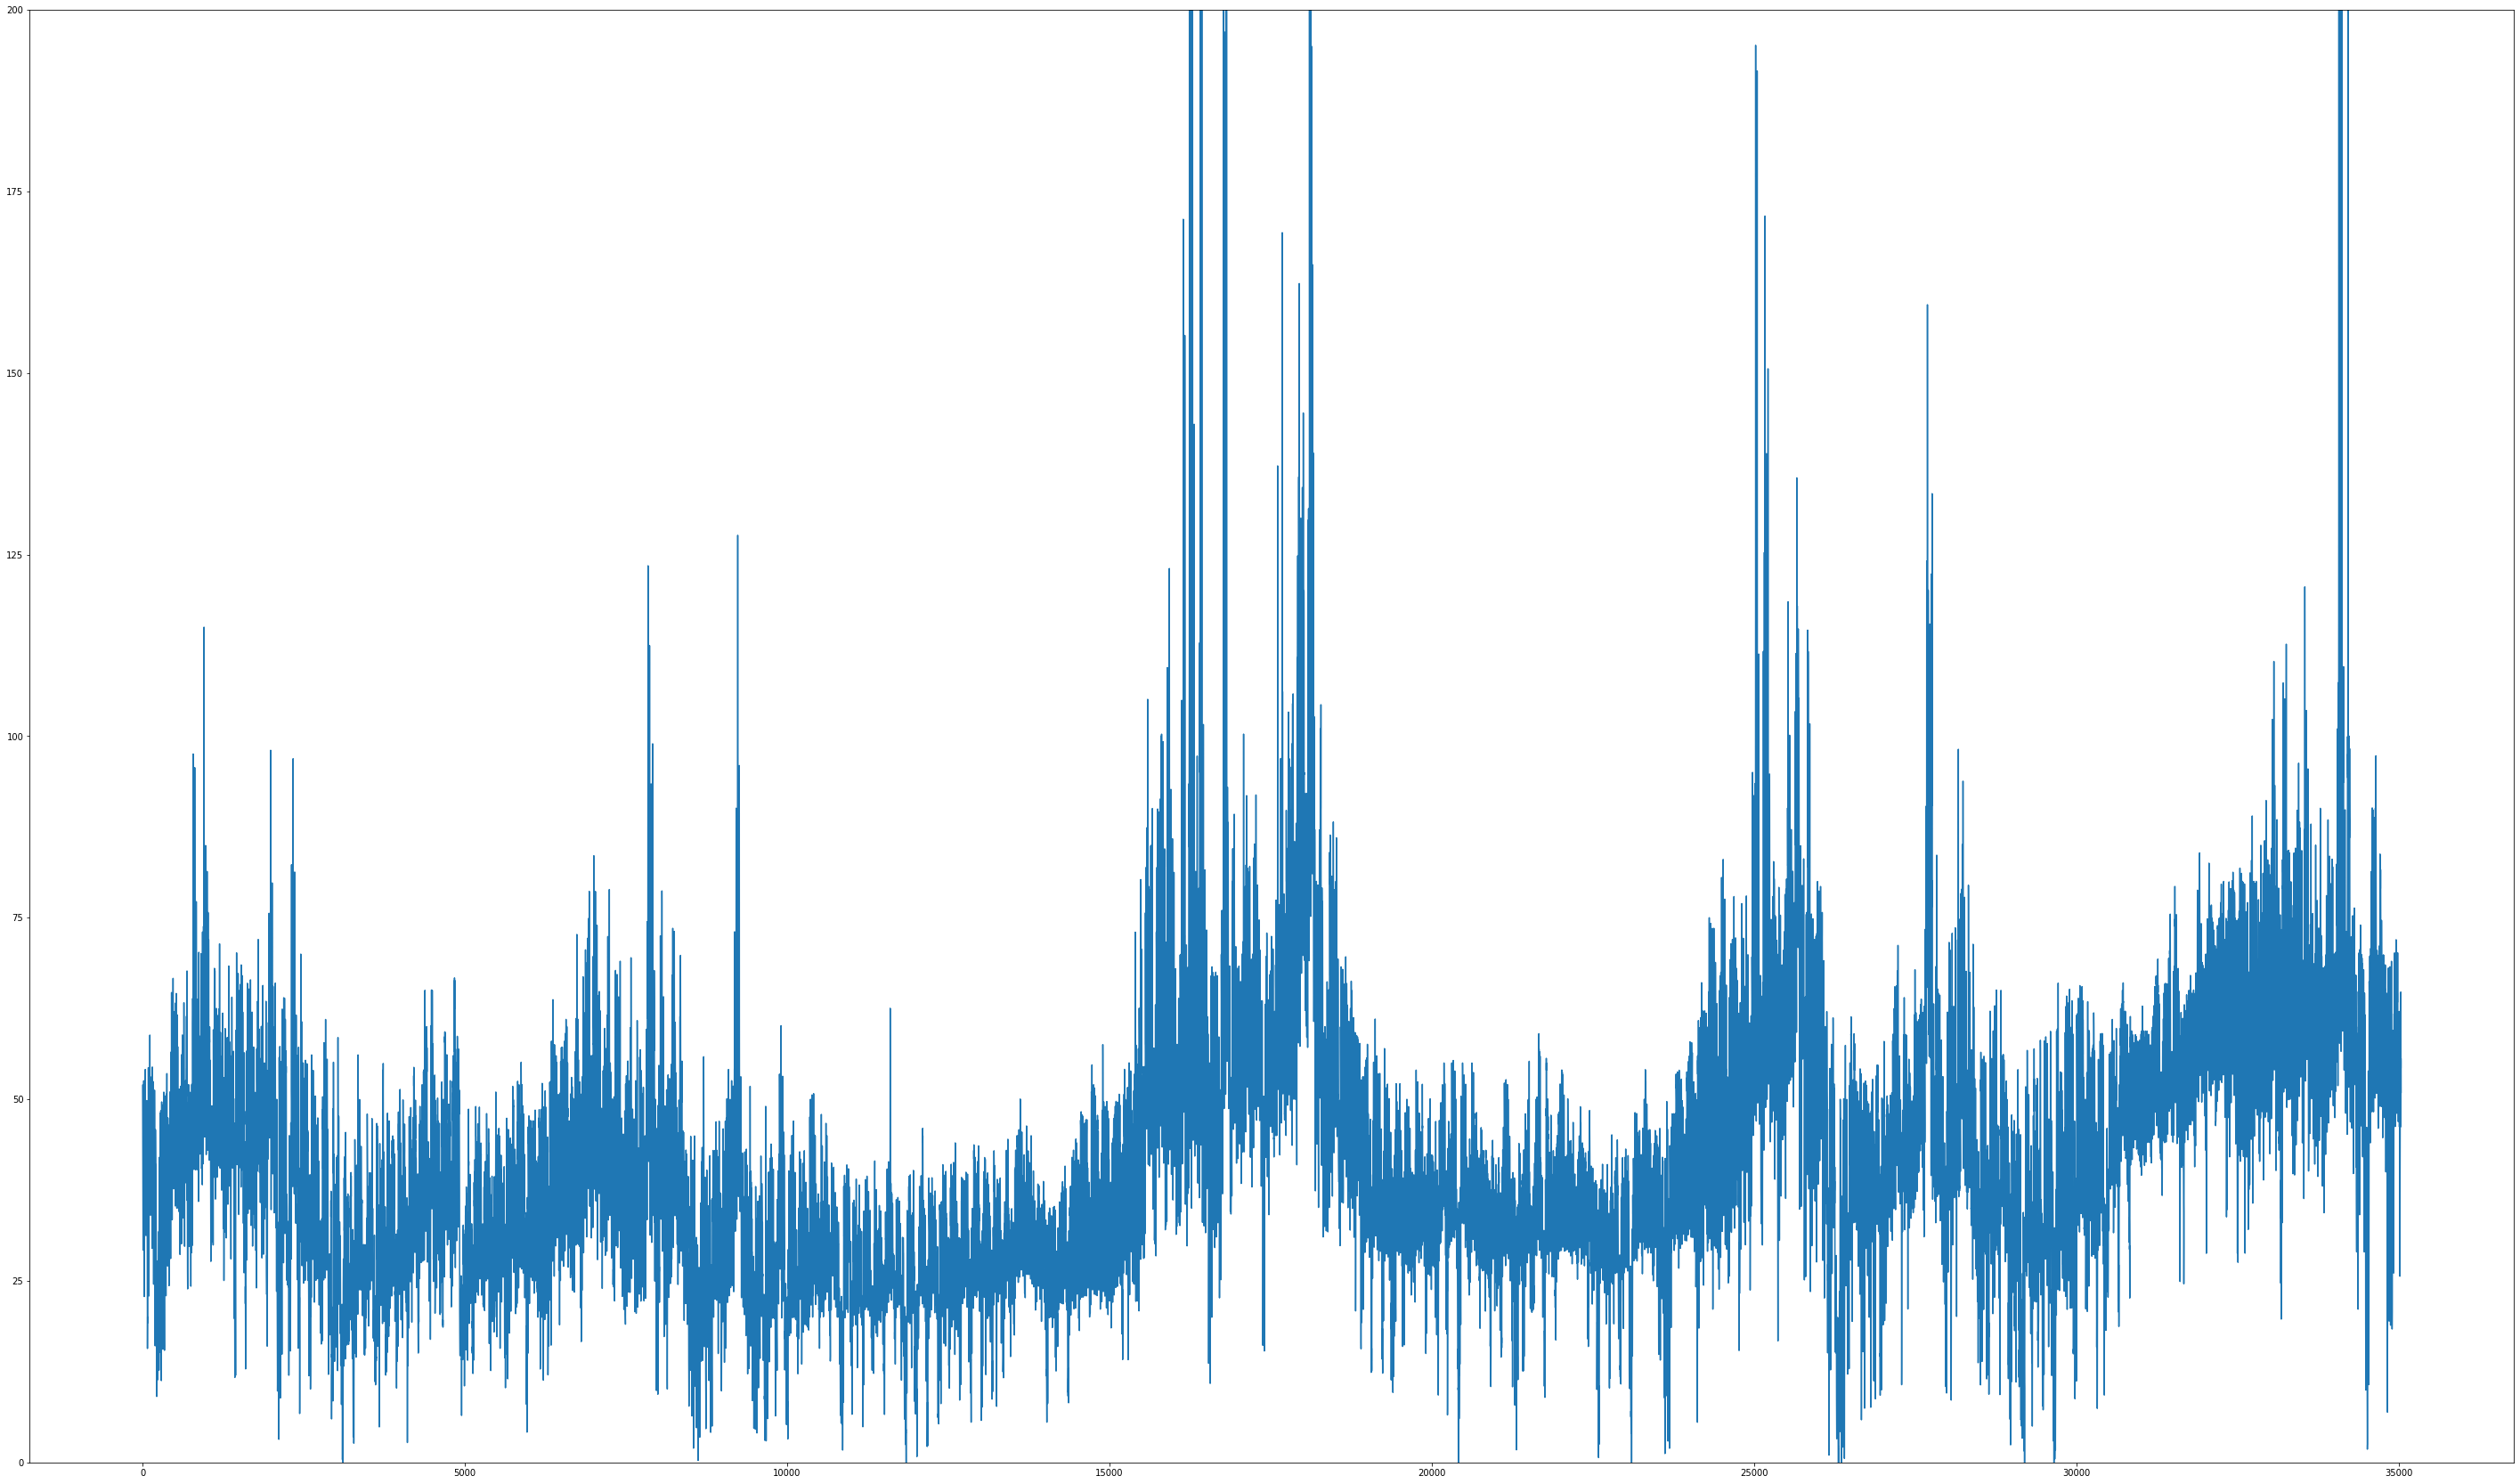

In [79]:
print(prices)
alpha = 1
prices_2015 = prices['price_obs'][0*8760:4*int(alpha*8760)].to_numpy()
plt.figure(figsize=(50, 30))
plt.ylim(0,200)
plt.plot(prices_2015)

## Gather Data

In [80]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data/'
OUTPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data_preprocessed/'
years = [2015, 2016, 2017, 2018]

In [81]:
prices = pd.read_csv(INPUT_FOLDER + 'r_da_prices_df_15_18.csv')
print(prices)

       Unnamed: 0 AREAS          TIMESTAMP_d  price_obs
0               0    FR  2015-01-01 00:00:00      51.93
1               1    FR  2015-01-01 01:00:00      48.76
2               2    FR  2015-01-01 02:00:00      42.27
3               3    FR  2015-01-01 03:00:00      38.41
4               4    FR  2015-01-01 04:00:00      35.72
...           ...   ...                  ...        ...
35059       35059    FR  2018-12-31 19:00:00      50.01
35060       35060    FR  2018-12-31 20:00:00      45.50
35061       35061    FR  2018-12-31 21:00:00      49.80
35062       35062    FR  2018-12-31 22:00:00      44.26
35063       35063    FR  2018-12-31 23:00:00      51.00

[35064 rows x 4 columns]


In [82]:
fuel_emission_prices = pd.read_csv(INPUT_FOLDER + 'r_fuel_prices_df_15_18.csv').drop(columns='Unnamed: 0')
print(fuel_emission_prices)

        oil_price  coal_price  gas_price  co2_price          TIMESTAMP_d
0      352.446024   93.546575  38.051287   6.903732  2015-01-01 00:00:00
1      352.422575   93.554525  38.022534   6.903888  2015-01-01 01:00:00
2      352.399126   93.562475  37.993781   6.904044  2015-01-01 02:00:00
3      352.375677   93.570425  37.965028   6.904199  2015-01-01 03:00:00
4      352.352228   93.578375  37.936275   6.904355  2015-01-01 04:00:00
...           ...         ...        ...        ...                  ...
35059  389.699802  141.278862  56.241700  23.124524  2018-12-31 19:00:00
35060  389.670362  141.288722  56.239082  23.123750  2018-12-31 20:00:00
35061  389.640922  141.298583  56.236464  23.122976  2018-12-31 21:00:00
35062  389.611482  141.308443  56.233847  23.122202  2018-12-31 22:00:00
35063  389.582042  141.318304  56.231229  23.121429  2018-12-31 23:00:00

[35064 rows x 5 columns]


Availibility Factor

In [83]:
avail_factor = pd.DataFrame()
for year in years:
    local_factor = pd.read_csv(INPUT_FOLDER + f'r_availabilityFactor{year}_FR.csv')
    avail_factor = pd.concat((avail_factor, local_factor), ignore_index=True)
print(avail_factor)

        TIMESTAMP           TECHNOLOGIES  availabilityFactor
0               1             Fossil Gas            0.944781
1               1       Fossil Hard coal            0.614233
2               1             Fossil Oil            0.932331
3               1  Hydro Water Reservoir            0.968103
4               1                Nuclear            0.929590
...           ...                    ...                 ...
175315       8760             Fossil Gas            0.952784
175316       8760       Fossil Hard coal            1.000000
175317       8760             Fossil Oil            0.800872
175318       8760  Hydro Water Reservoir            1.000000
175319       8760                Nuclear            0.895454

[175320 rows x 3 columns]


Interconnexions

In [84]:
interco = pd.DataFrame()
for year in years:
    local_interco = pd.read_csv(INPUT_FOLDER + f'r_interco_values_{year}.csv')
    interco = pd.concat((interco, local_interco), ignore_index=True)
print(interco)

       AREAS           TIMESTAMP_d INTERCOS  availabilityFactor_import  \
0         FR  2015-01-01T00:00:00Z       BE                   0.621622   
1         FR  2015-01-01T01:00:00Z       BE                   0.621622   
2         FR  2015-01-01T02:00:00Z       BE                   0.621622   
3         FR  2015-01-01T03:00:00Z       BE                   0.621622   
4         FR  2015-01-01T04:00:00Z       BE                   0.621622   
...      ...                   ...      ...                        ...   
210379    FR  2018-12-31T19:00:00Z       DE                   1.000000   
210380    FR  2018-12-31T20:00:00Z       DE                   1.000000   
210381    FR  2018-12-31T21:00:00Z       DE                   1.000000   
210382    FR  2018-12-31T22:00:00Z       DE                   1.000000   
210383    FR  2018-12-31T23:00:00Z       DE                   1.000000   

        availabilityFactor_export   da_price  
0                        0.861111  30.510000  
1                

#### Margin

In [85]:
def compute_margin(year_test, area):
    INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data/'

    avail_factor_df = pd.read_csv(INPUT_FOLDER + 'r_availabilityFactor' + str(year_test) + '_' + str(area) + '.csv')
    area_consumption_df = pd.read_csv(INPUT_FOLDER + 'r_areaConsumption_no_phes' + str(year_test) + '_' + str(area) + '.csv')
    tech_case='r_article_ramp'
    tech_parameters_df = pd.read_csv(INPUT_FOLDER+'Gestion_'+tech_case+'_TECHNOLOGIES'+str(year_test)+'.csv')
    tech_parameters_df.fillna(0, inplace=True)

    avail_factor_df = avail_factor_df.join(tech_parameters_df.set_index('TECHNOLOGIES')['capacity'], on='TECHNOLOGIES')
    avail_factor_df = avail_factor_df.assign(real_capacity=lambda x:x.capacity*x.availabilityFactor)
    real_capacities = avail_factor_df[['TIMESTAMP', 'real_capacity']].groupby('TIMESTAMP').sum()
    real_capacities.reset_index(inplace=True)
    real_capacities['margin'] = real_capacities['real_capacity'] - area_consumption_df['areaConsumption']

    return real_capacities['margin']

        margin
0      22626.0
1      21960.0
2      25178.0
3      28407.0
4      30563.0
...        ...
35059  25801.0
35060  27926.0
35061  29386.0
35062  24657.0
35063  23700.0

[35064 rows x 1 columns]


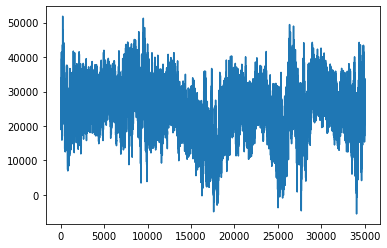

In [86]:
margin_df = pd.DataFrame()
for year in years:
    margin = compute_margin(year, 'FR')
    margin_df = pd.concat((margin_df, margin), ignore_index=True)
margin_df = margin_df.rename({0:'margin'}, axis='columns')
print(margin_df)
plt.plot(margin_df)

## Outlier : Prices

In [87]:
from sklearn.preprocessing import StandardScaler

[42.59330653] [407.43048661]
count :  283


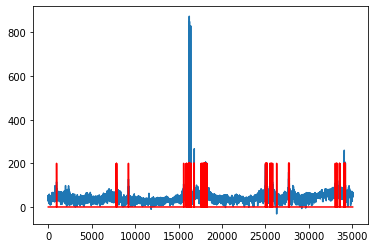

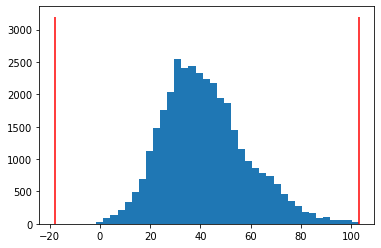

(array([2.000e+00, 3.000e+00, 3.000e+00, 1.140e+02, 7.930e+02, 2.871e+03,
        6.326e+03, 7.814e+03, 6.778e+03, 4.597e+03, 2.640e+03, 1.719e+03,
        6.980e+02, 2.860e+02, 1.530e+02, 9.400e+01, 6.600e+01, 2.800e+01,
        1.900e+01, 1.200e+01, 1.200e+01, 5.000e+00, 8.000e+00, 1.000e+00,
        2.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

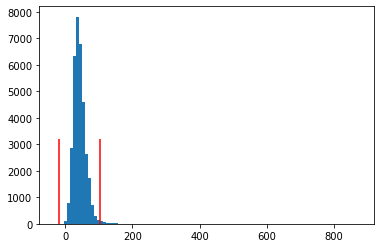

In [88]:
scaler = StandardScaler()
scaler.fit(prices['price_obs'].values.reshape(-1, 1))
print(scaler.mean_, scaler.var_)

mean = scaler.mean_[0]
sd = np.sqrt(scaler.var_[0])

plt.plot(prices['price_obs'])
# print( prices[ (-3 <= prices['price_obs']) & (prices['price_obs'] <= 3) ] )
filtered = ~((mean - 3*sd <= prices['price_obs']) & (prices['price_obs'] <= mean + 3*sd))
print('count : ', np.count_nonzero(filtered))
plt.plot(range(35064), 200 * filtered, color='r')
plt.show()
plt.vlines(mean - 3*sd, 0, 3200, color='r')
plt.vlines(mean + 3*sd, 0, 3200, color='r')
plt.hist(prices['price_obs'][~filtered], bins=42)
plt.show()
plt.vlines(mean - 3*sd, 0, 3200, color='r')
plt.vlines(mean + 3*sd, 0, 3200, color='r')
plt.hist(prices['price_obs'], bins=100);

#### Prices without outliers

0


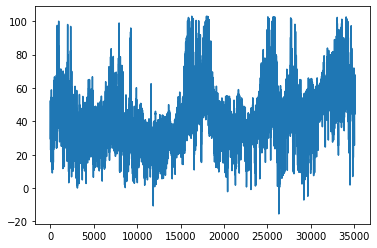

In [89]:
prices.loc[filtered, 'price_obs'] = np.NaN
prices['price_obs'].fillna(method='pad', inplace=True)
plt.plot(prices['price_obs'])
print(np.count_nonzero(np.isnan(prices['price_obs'])))

## Preprocessing

In [15]:
standardization_data = pd.DataFrame()

### Standardize : prices, drivers and margin

[42.37543692] [319.72765519]


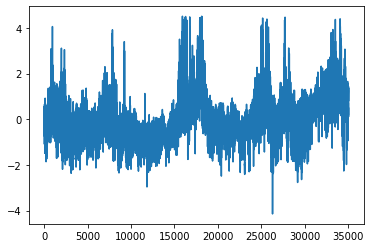

In [16]:
scaler_price = StandardScaler()
scaler_price.fit(prices['price_obs'].values.reshape(-1, 1))
print(scaler_price.mean_, scaler_price.var_)
plt.plot(scaler_price.transform(prices['price_obs'].values.reshape(-1, 1)))
prices['price_obs'] = scaler_price.transform(prices['price_obs'].values.reshape(-1, 1))
standardization_data['price_mean'] = scaler_price.mean_
standardization_data['price_sd'] = np.sqrt(scaler_price.var_)

[370.82184592] [4690.10528424]


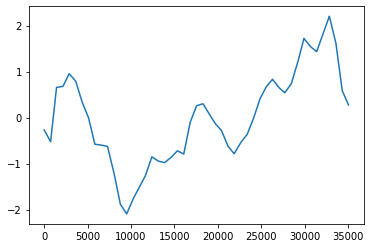

[112.54884884] [629.16159602]


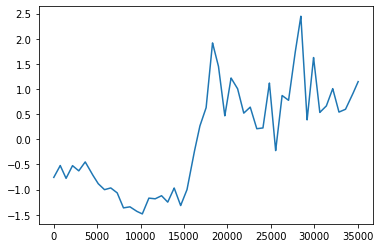

[38.06950357] [129.66729073]


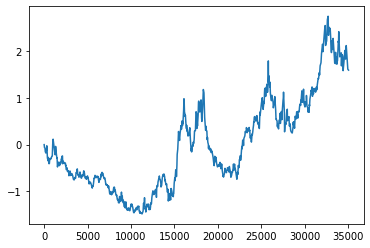

[8.69985089] [22.99665604]


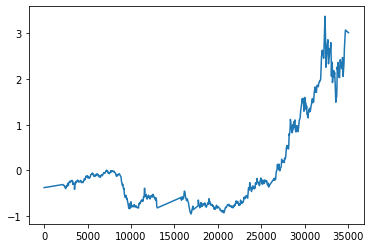

In [17]:
for driver in ['oil_price', 'coal_price', 'gas_price', 'co2_price']:
    scaler_fuel= StandardScaler()
    scaler_fuel.fit(fuel_emission_prices[driver].values.reshape(-1, 1))
    print(scaler_fuel.mean_, scaler_fuel.var_)
    fuel_emission_prices[driver] = scaler_fuel.transform(fuel_emission_prices[driver].values.reshape(-1, 1))
    plt.plot(fuel_emission_prices[driver].values.reshape(-1, 1))
    plt.ylabel(driver)
    plt.show()
    standardization_data[driver+'_mean'] = scaler_fuel.mean_
    standardization_data[driver+'_sd'] = np.sqrt(scaler_fuel.var_)

[24489.23398317] [58449964.80590434]


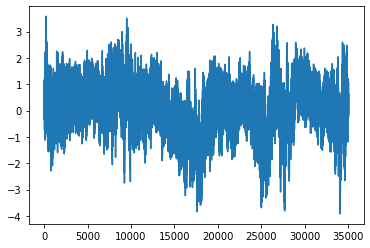

In [18]:
scaler_margin = StandardScaler()
scaler_margin.fit(margin_df['margin'].values.reshape(-1, 1))
print(scaler_margin.mean_, scaler_margin.var_)
margin_df['margin'] = scaler_margin.transform(margin_df['margin'].values.reshape(-1, 1))
plt.plot(margin_df['margin'])
standardization_data['margin_mean'] = scaler_margin.mean_
standardization_data['margin_sd'] = np.sqrt(scaler_margin.var_)

In [19]:
print(standardization_data)

   price_mean  price_sd  oil_price_mean  oil_price_sd  coal_price_mean  \
0   42.375437  17.88093      370.821846     68.484343       112.548849   

   coal_price_sd  gas_price_mean  gas_price_sd  co2_price_mean  co2_price_sd  \
0      25.083094       38.069504     11.387155        8.699851      4.795483   

    margin_mean    margin_sd  
0  24489.233983  7645.257668  


### Detrending

#### Observed Prices

In [24]:
prices_res = STL(prices['price_obs'], period=24*7*12*4, seasonal=23*7).fit()

<Figure size 2160x1800 with 0 Axes>

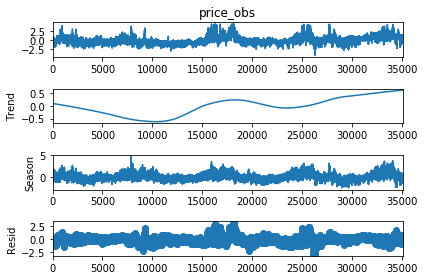

0


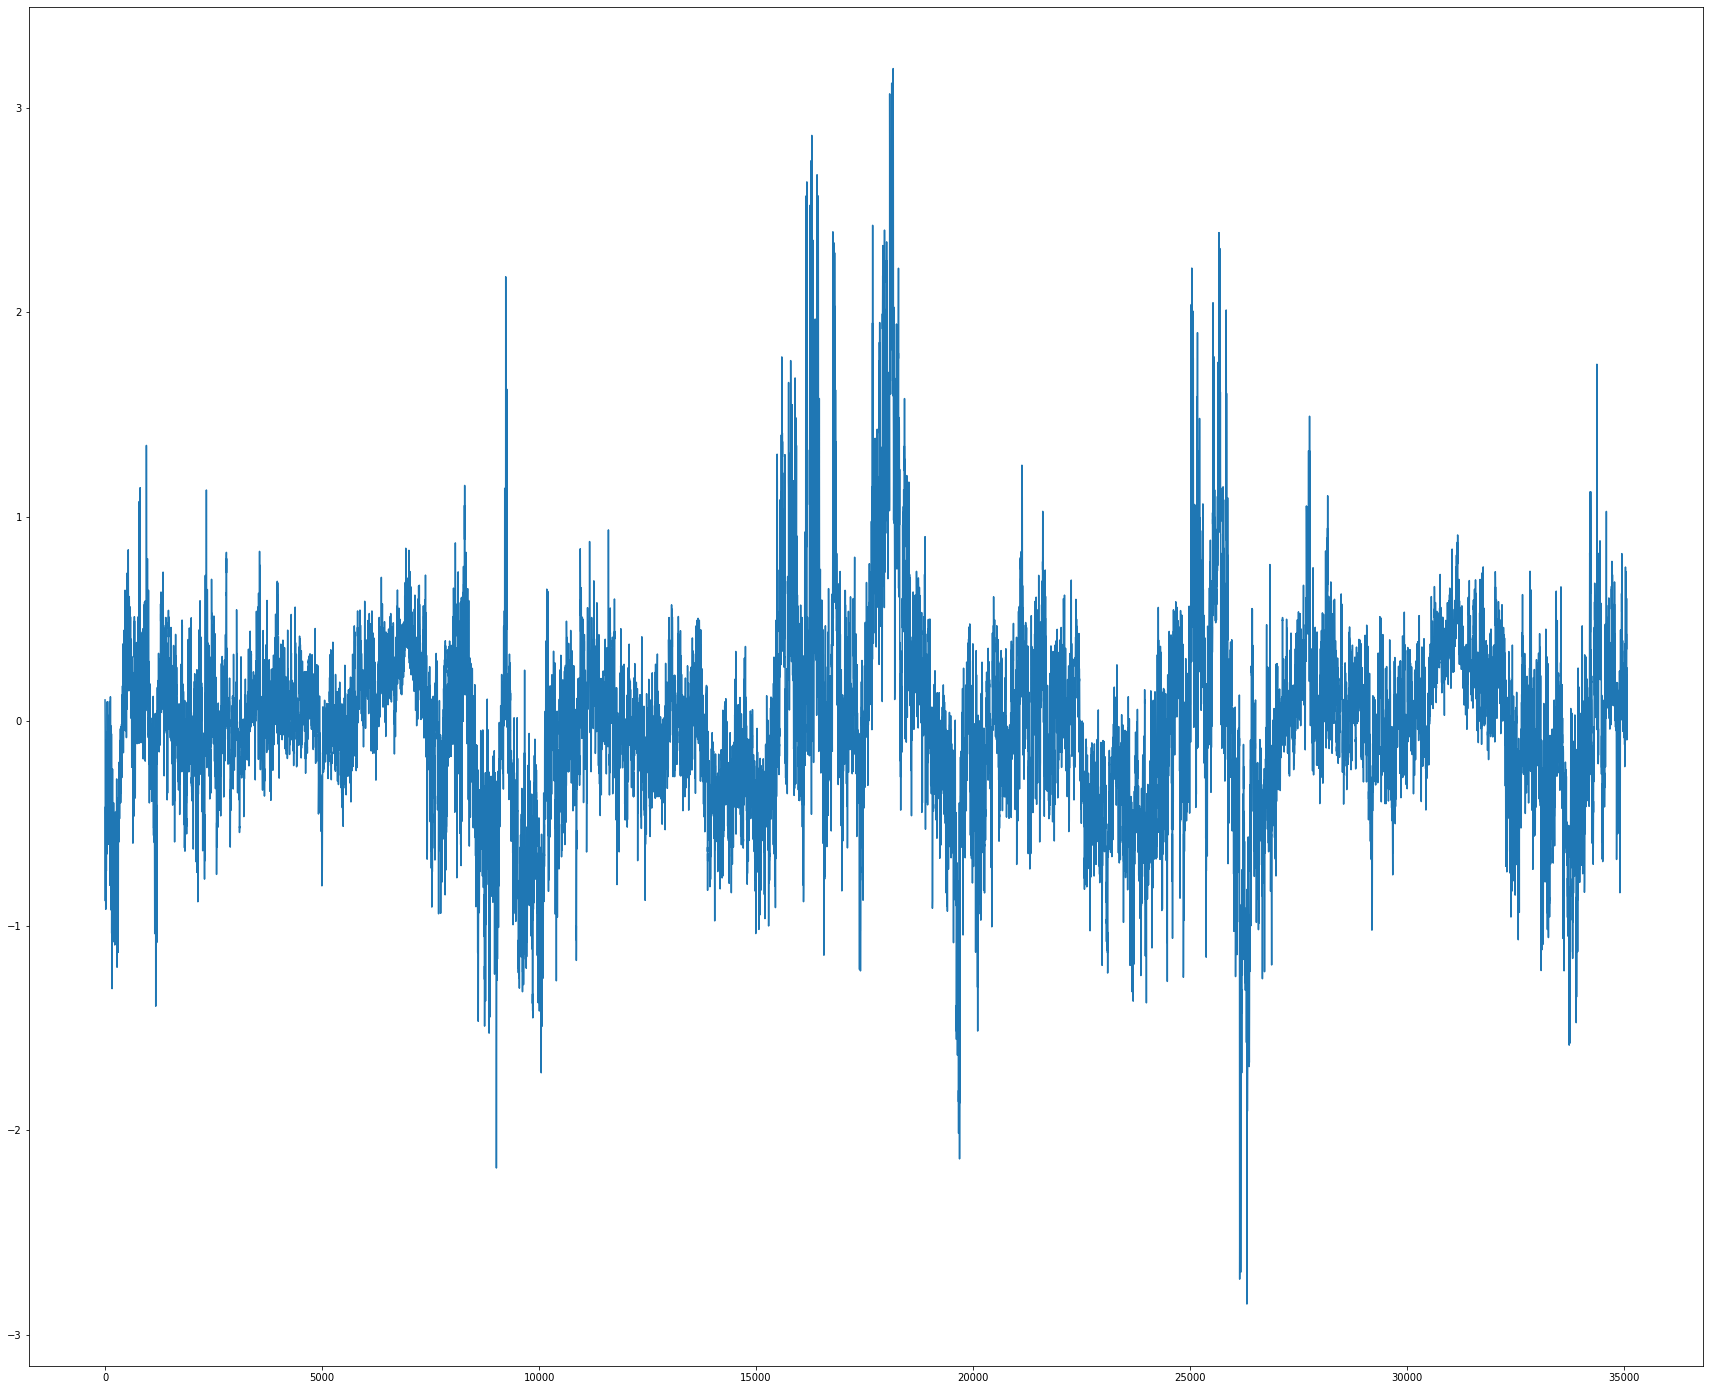

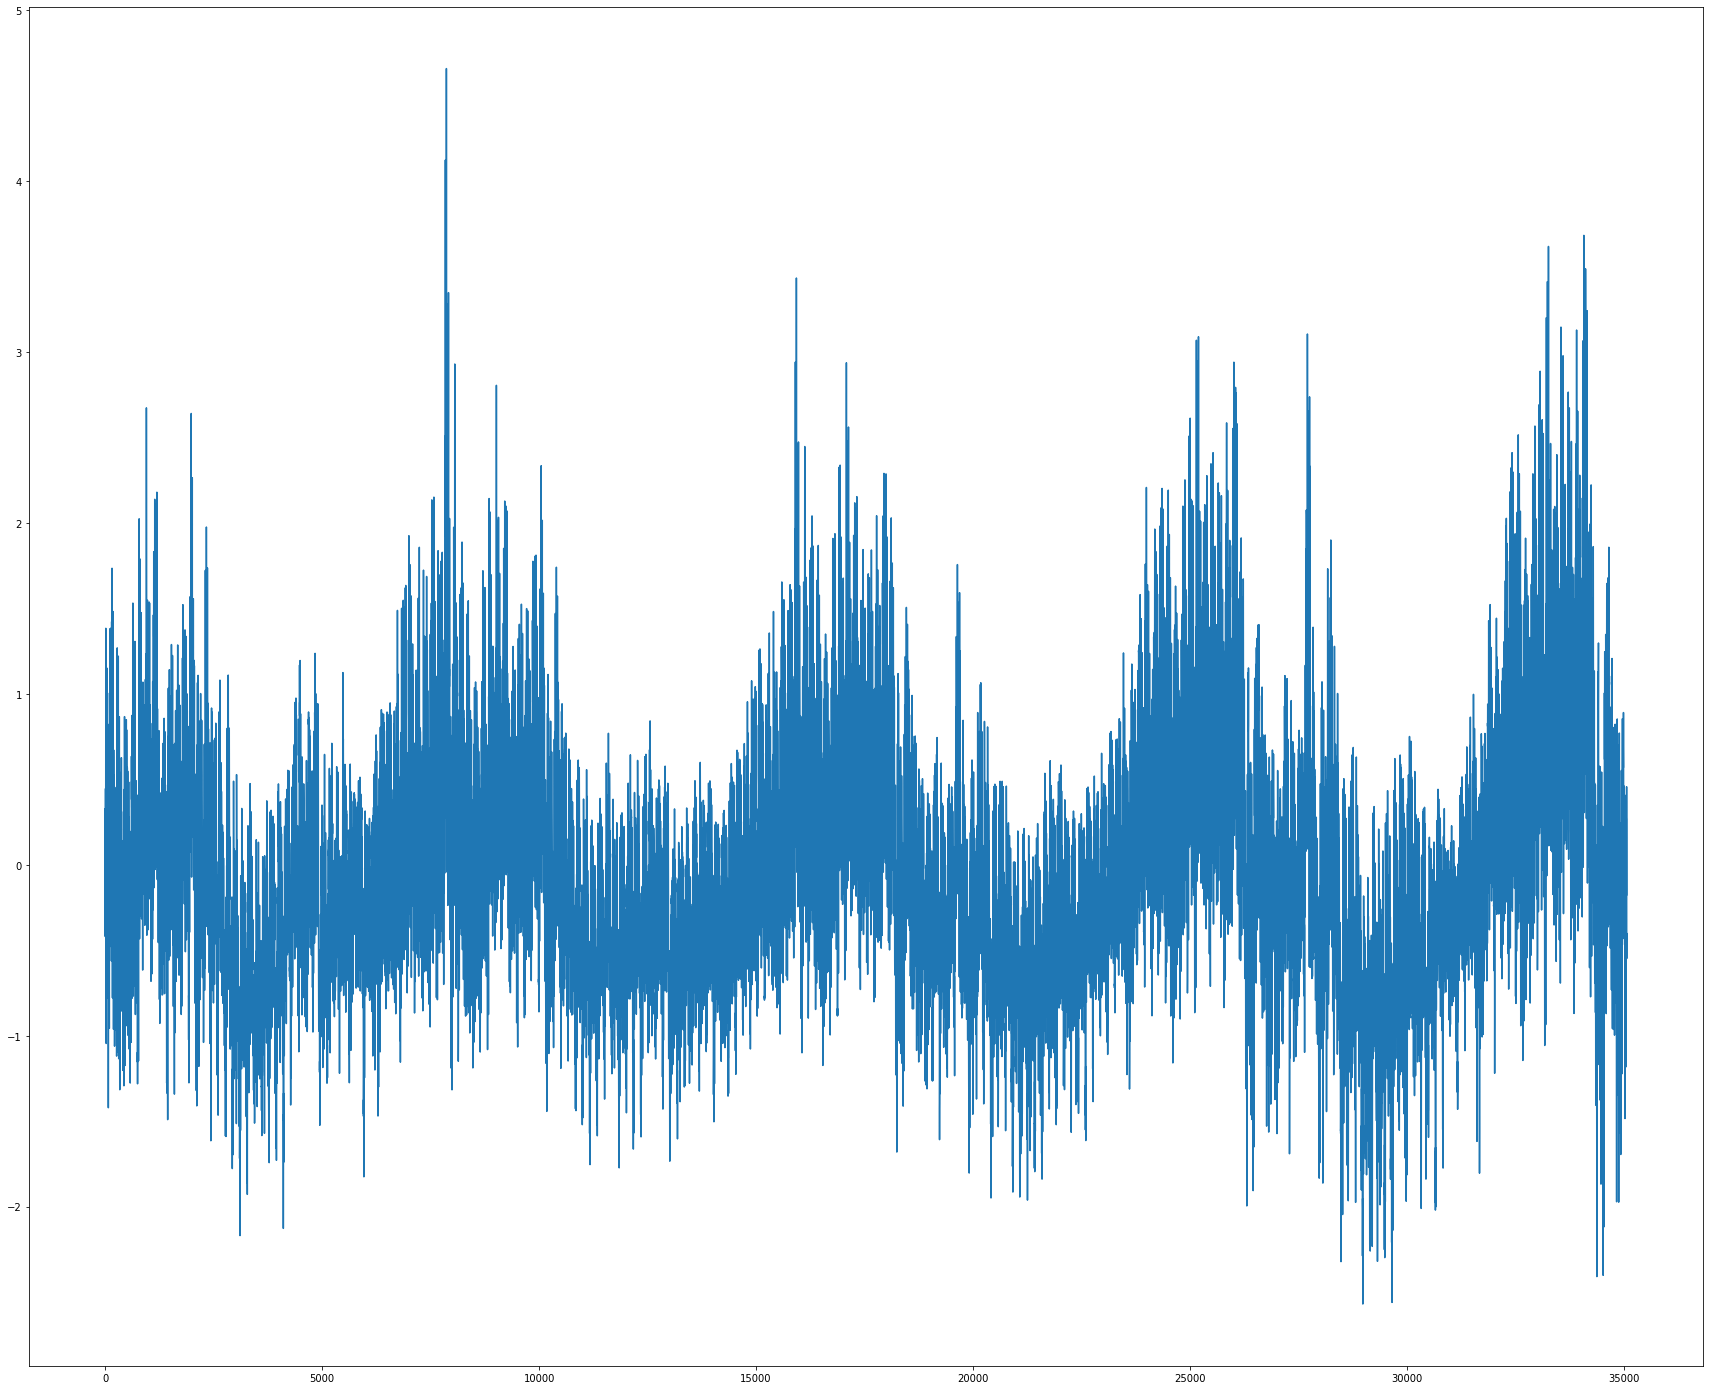

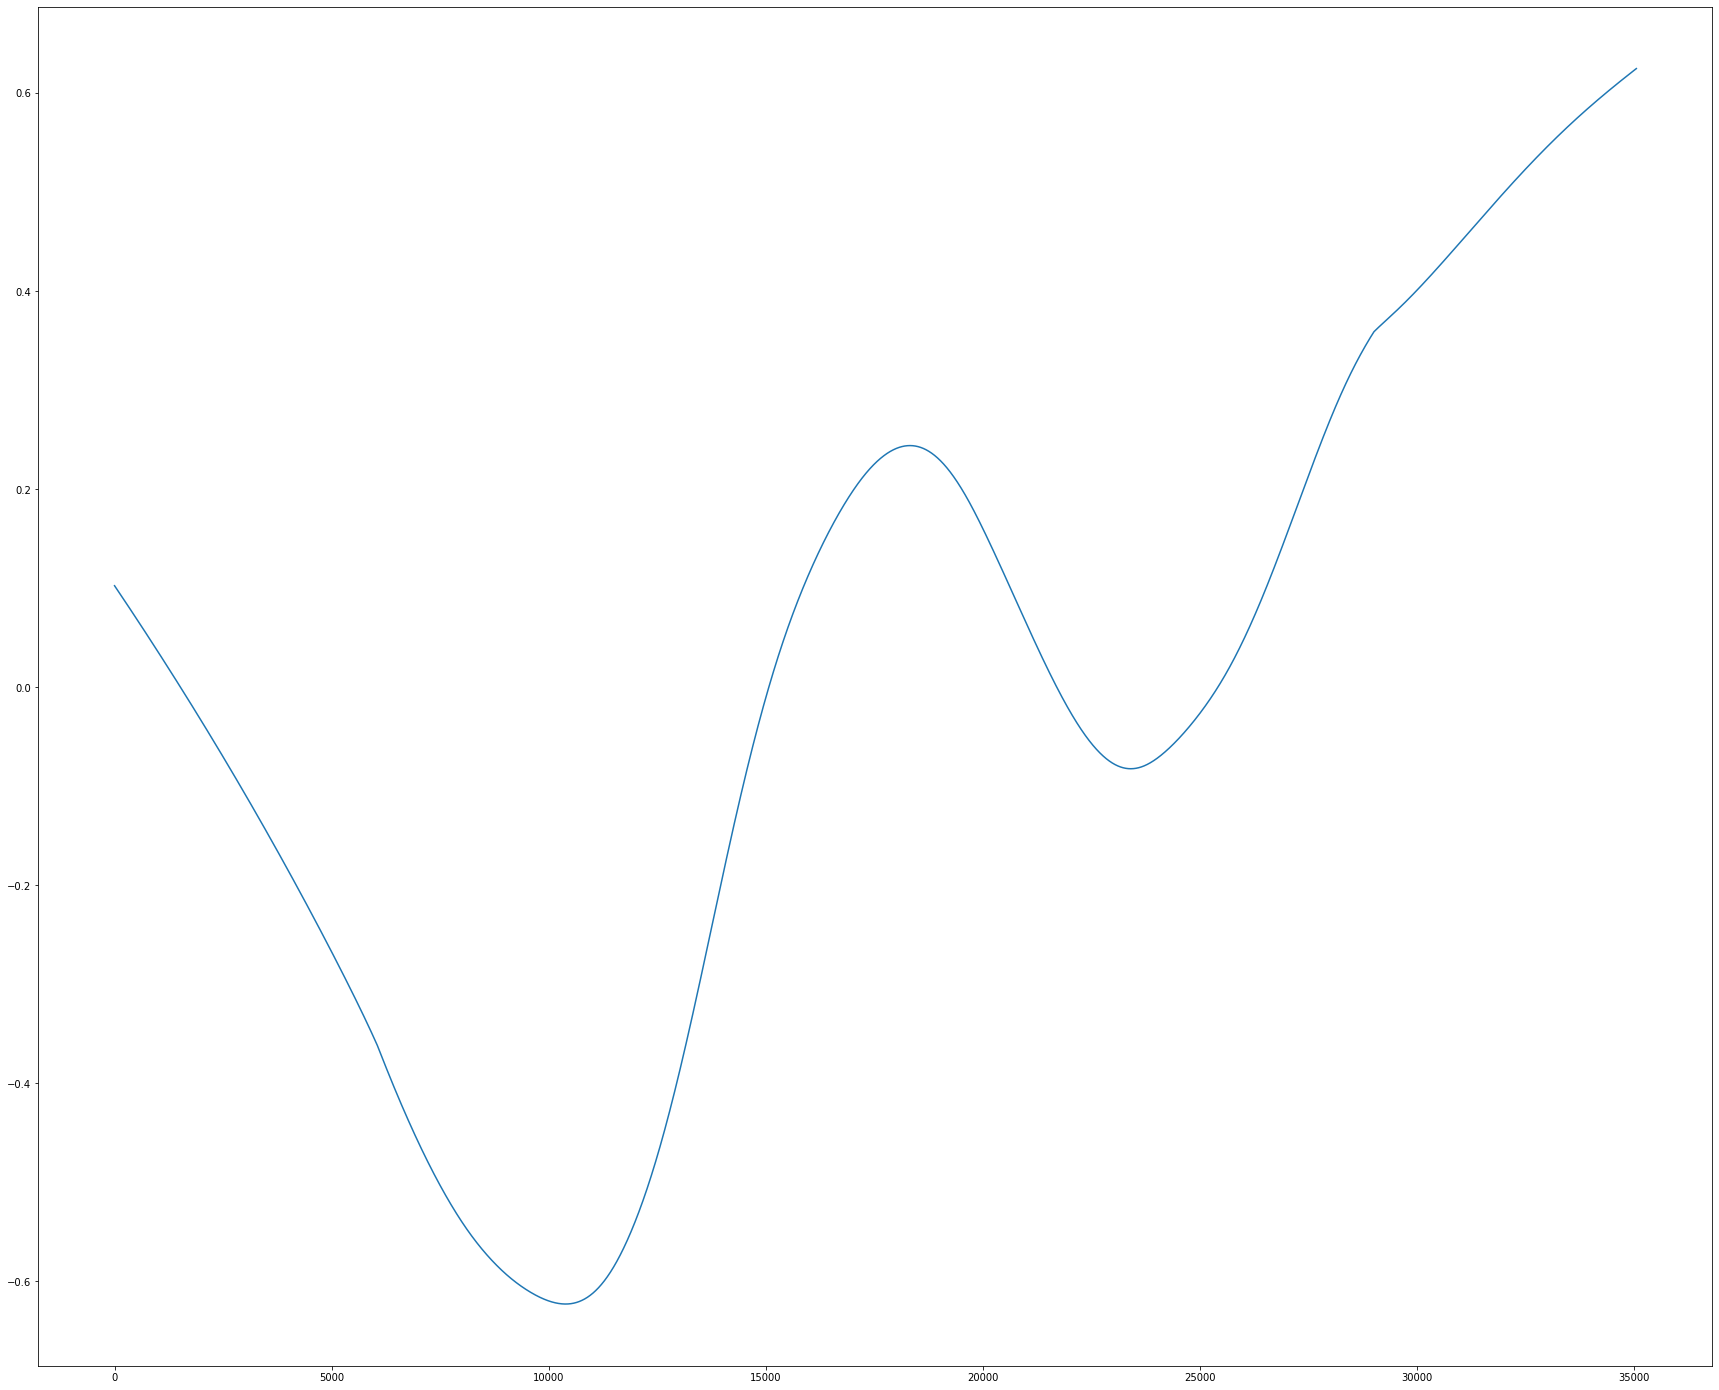

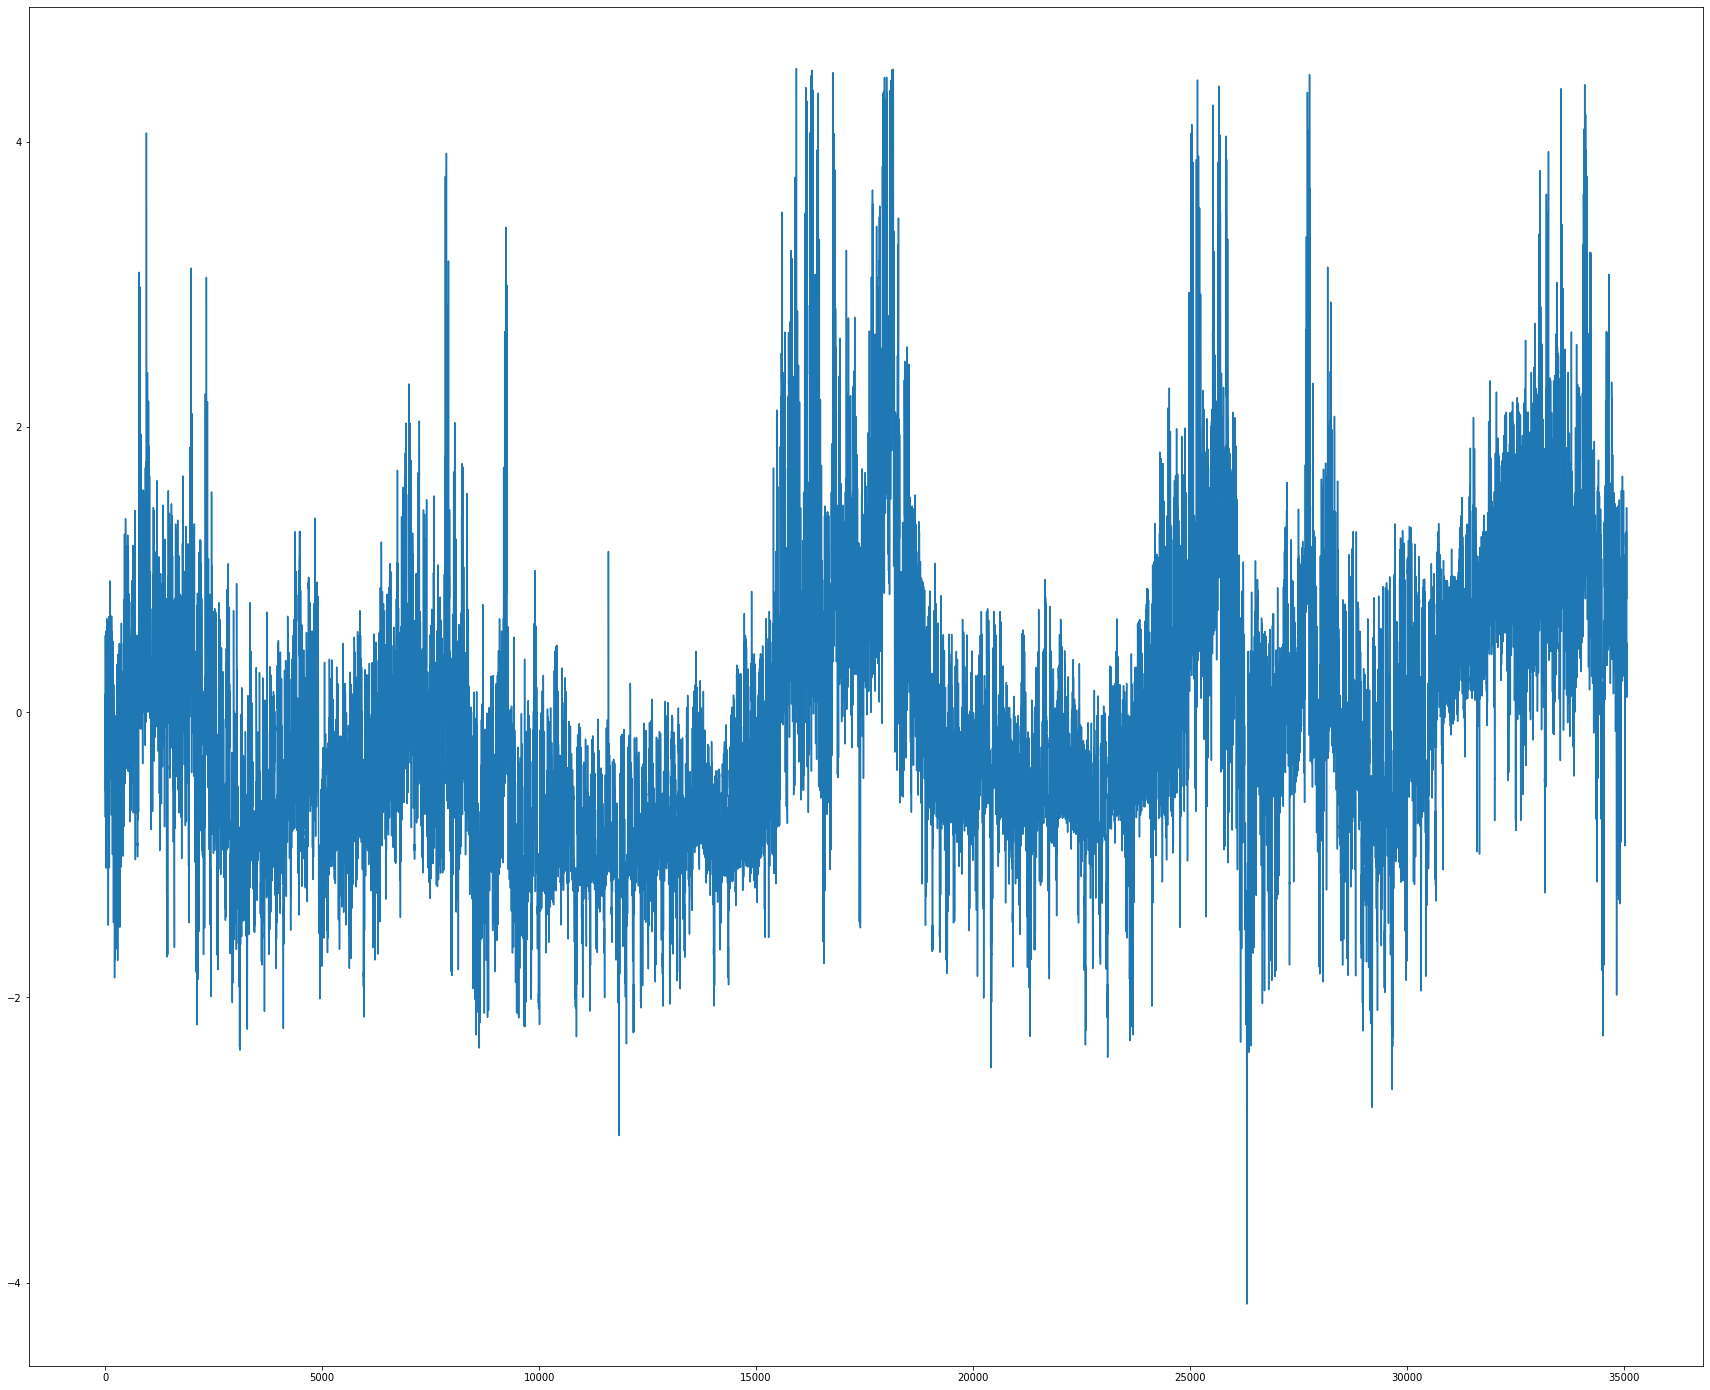

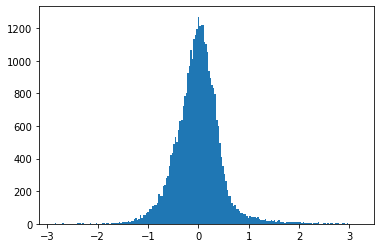

In [25]:
plt.figure(figsize=(30, 25));
prices_res.plot()
plt.show()
print(np.count_nonzero(np.isnan(prices['price_obs'])))
prices['price_trend'] = prices_res.trend
prices['price_seasonal'] = prices_res.seasonal
prices['price_resid'] = prices_res.resid
plt.figure(figsize=(30, 25));

plt.plot(prices['price_resid'])
plt.ylabel('residual')
plt.show()
plt.figure(figsize=(30, 25));

plt.plot((prices['price_seasonal']))
plt.ylabel('seasonal')
plt.show()
plt.figure(figsize=(30, 25));

plt.plot(prices['price_trend'])
plt.ylabel('trend')
plt.show()

plt.figure(figsize=(30, 25));

plt.plot(prices['price_obs'])
plt.ylabel('observed prices')
plt.show()

# plt.hist(prices['price_resid'], bins=200);

#### Fuel and emission prices

       oil_price  coal_price  gas_price  co2_price          TIMESTAMP_d  \
0      -0.268322   -0.757573  -0.001600  -0.374544  2015-01-01 00:00:00   
1      -0.268664   -0.757256  -0.004125  -0.374511  2015-01-01 01:00:00   
2      -0.269006   -0.756939  -0.006650  -0.374479  2015-01-01 02:00:00   
3      -0.269349   -0.756622  -0.009175  -0.374446  2015-01-01 03:00:00   
4      -0.269691   -0.756305  -0.011700  -0.374414  2015-01-01 04:00:00   
...          ...         ...        ...        ...                  ...   
35059   0.275654    1.145394   1.595851   3.007971  2018-12-31 19:00:00   
35060   0.275224    1.145787   1.595621   3.007810  2018-12-31 20:00:00   
35061   0.274794    1.146180   1.595391   3.007648  2018-12-31 21:00:00   
35062   0.274364    1.146573   1.595161   3.007487  2018-12-31 22:00:00   
35063   0.273934    1.146966   1.594931   3.007325  2018-12-31 23:00:00   

       oil_price_trend  oil_price_seasonal  oil_price_resid  coal_price_trend  \
0            -0.52

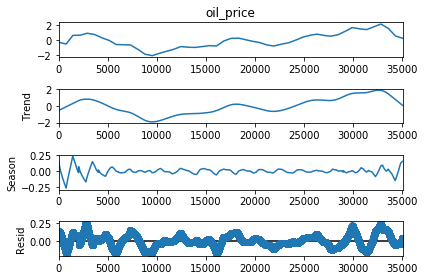

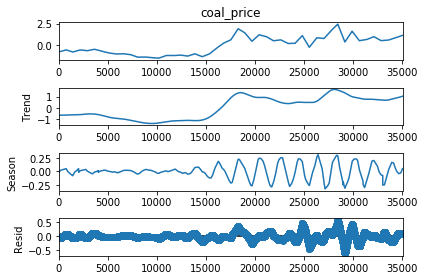

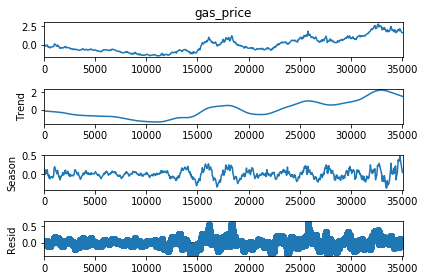

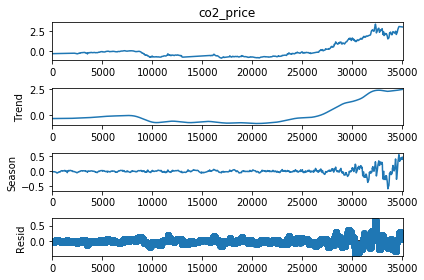

In [28]:
for driver in ['oil_price', 'coal_price', 'gas_price', 'co2_price']:
    driver_res = STL(fuel_emission_prices[driver], period=24*7*12).fit()
    driver_res.plot()
    fuel_emission_prices[f'{driver}_trend'] = driver_res.trend
    fuel_emission_prices[f'{driver}_seasonal'] = driver_res.seasonal
    fuel_emission_prices[f'{driver}_resid'] = driver_res.resid
print(fuel_emission_prices)

#### Margin

         margin  margin_trend  margin_seasonal  margin_resid
0     -0.243711      0.297757        -0.540932     -0.000535
1     -0.330824      0.297548        -0.574034     -0.054338
2      0.090091      0.297339        -0.150565     -0.056683
3      0.512444      0.297131         0.185870      0.029443
4      0.794449      0.296923         0.324892      0.172635
...         ...           ...              ...           ...
35059  0.171579      0.057833        -0.021145      0.134891
35060  0.449529      0.058147         0.196534      0.194849
35061  0.640497      0.058460         0.031090      0.550947
35062  0.021944      0.058774        -0.108503      0.071673
35063 -0.103232      0.059088         0.090248     -0.252568

[35064 rows x 4 columns]


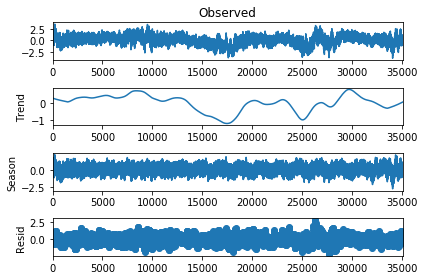

In [29]:
margin_res = STL(margin_df, period=24*7*12).fit()
margin_res.plot()
margin_df['margin_trend'] = margin_res.trend
margin_df['margin_seasonal'] = margin_res.seasonal
margin_df['margin_resid'] = margin_res.resid
print(margin_df)

#### Plot observed prices, trend, seasonal and residual 

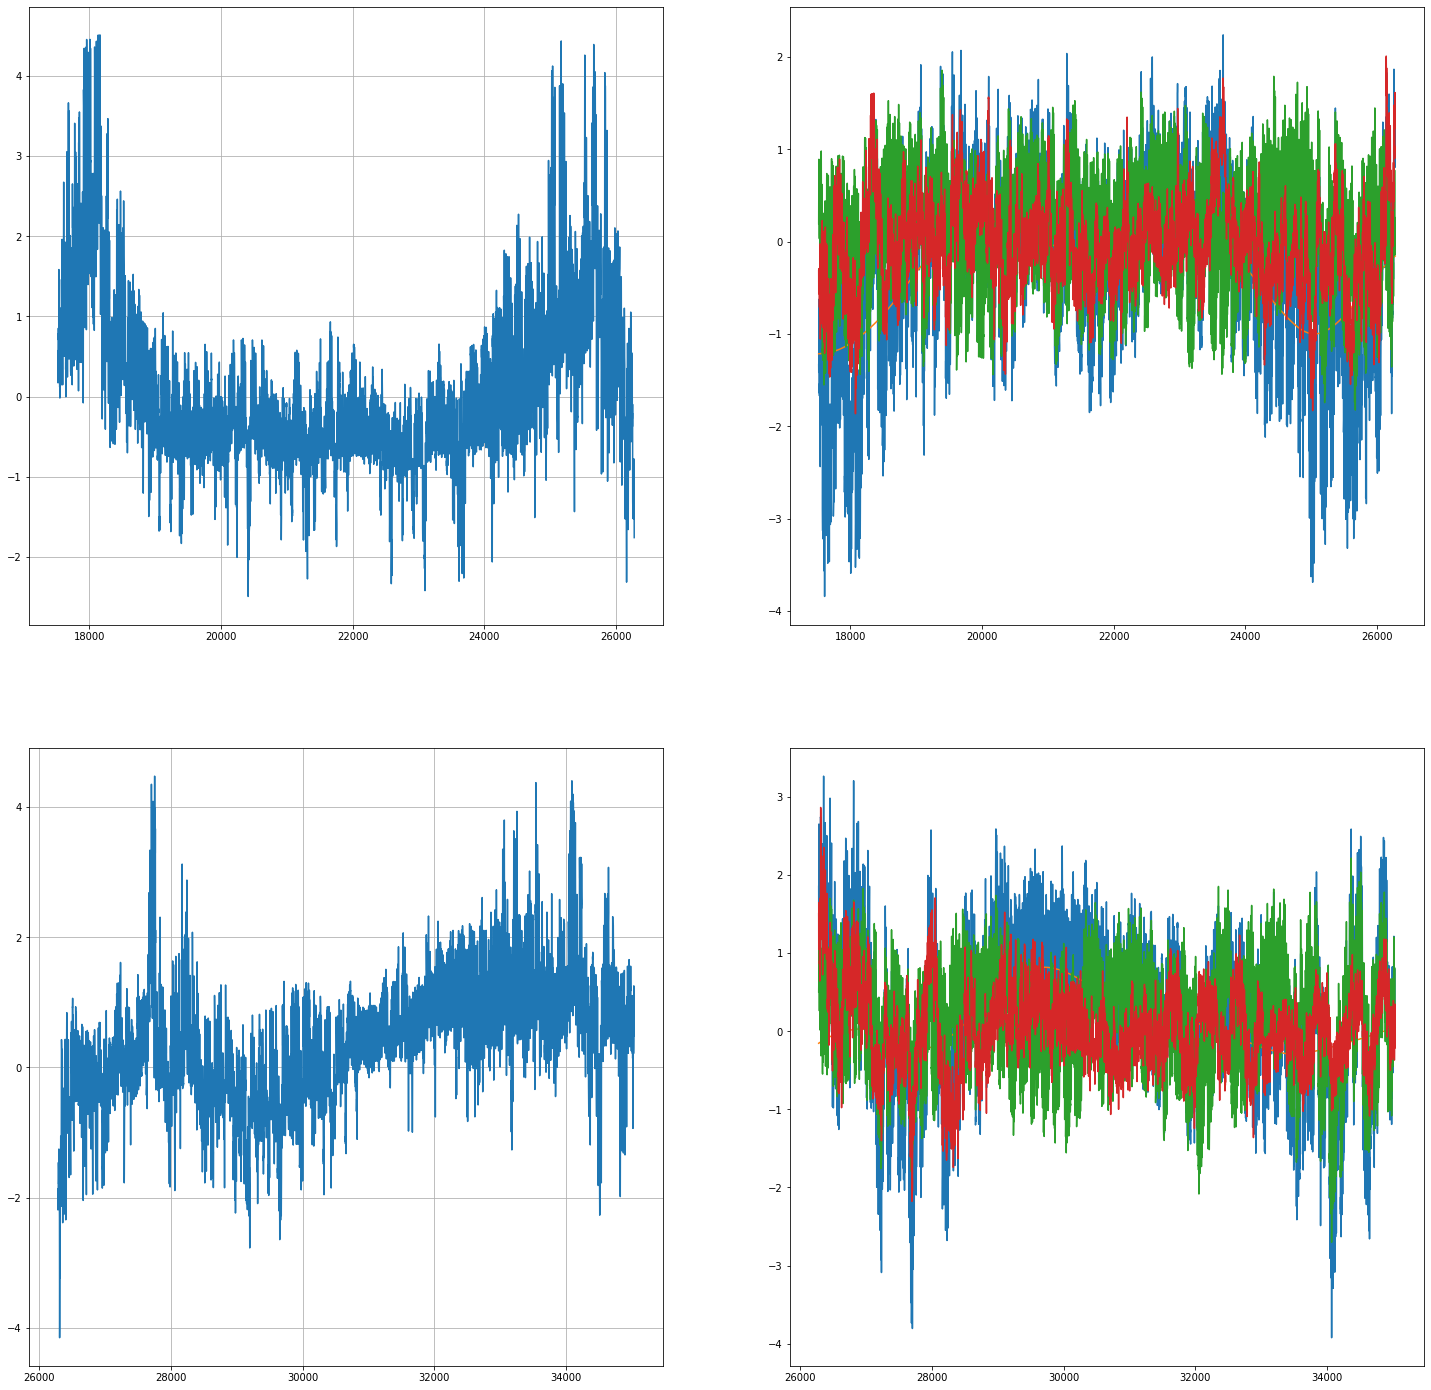

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(25, 25))
deb = 8760*2
fin = 8760*3
axs[0, 0].plot(prices['price_obs'][deb:fin])
axs[0, 1].plot(margin_df[deb:fin])
axs[0, 0].grid(True)

deb = 8760*3
fin = 8760*4
axs[1, 0].plot(prices['price_obs'][deb:fin])
axs[1, 1].plot(margin_df[deb:fin])
axs[1, 0].grid(True)

## Extract final datasets

In [1]:
final_fuel_emission_prices = pd.read_csv(INPUT_FOLDER + 'r_fuel_prices_df_15_18.csv')
for driver in ['oil_price', 'coal_price', 'gas_price', 'co2_price']:
    final_fuel_emission_prices[driver] = fuel_emission_prices[driver+'_resid']
final_margin = pd.DataFrame()
final_margin['TIMESTAMP_d'] = final_fuel_emission_prices['TIMESTAMP_d']
final_margin['margin'] = margin_df['margin_resid']
print(final_fuel_emission_prices, final_margin)

In [31]:
OUTPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data_preprocessed/'

In [32]:
margin_df.to_csv(OUTPUT_FOLDER + 'complete_margin.csv')
fuel_emission_prices.to_csv(OUTPUT_FOLDER + 'complete_fuel_prices.csv')
# prices.drop('Unnamed: 0', axis='columns').to_csv(OUTPUT_FOLDER + 'obs_prices.csv')
# final_margin.to_csv(OUTPUT_FOLDER + 'margin.csv')
# final_fuel_emission_prices.drop('Unnamed: 0', axis='columns').to_csv(OUTPUT_FOLDER + 'fuel_prices.csv')
# standardization_data.to_csv(OUTPUT_FOLDER + 'mean_sd.csv')